In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


In [2]:
# Read the dataset
df=pd.read_csv('../input/vehicle-dataset-from-cardekho/car data.csv')
df.shape, df.columns

((301, 9),
 Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
        'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
       dtype='object'))

In [3]:
#Filter Dataset and add column with Current year
final_dataset=df[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]
final_dataset['Current Year']=2021
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [4]:
# Add column with Age of Vehicle
final_dataset['Age']=final_dataset['Current Year']- final_dataset['Year']

In [5]:
# convert categorical columns with get_dummies
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [6]:
# Set up x and y(target) data
y=final_dataset['Selling_Price']
x= final_dataset[['Present_Price', 'Kms_Driven', 'Owner', 'Age','Fuel_Type_Diesel', 
                 'Fuel_Type_Petrol', 'Seller_Type_Individual','Transmission_Manual']]

In [7]:
# Split the dataset with train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=20)

In [8]:
# Define the models
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

XG = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                  colsample_bynode=1, colsample_bytree=1, gamma=0,
                  importance_type='gain', interaction_constraints='',
                  learning_rate=0.01, max_delta_step=0, max_depth=4,
                  min_child_weight=1, monotone_constraints='()',
                  n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
                  reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
                  tree_method='exact', validate_parameters=1, verbosity=None)
RF = RandomForestRegressor(max_depth = 10,max_features = 'auto',min_samples_leaf = 1,
                           min_samples_split = 2,n_estimators = 1200)
GB = GradientBoostingRegressor(learning_rate =  0.01,max_depth =  6,max_features = 7, min_samples_leaf = 1,
                               min_samples_split = 20,n_estimators = 1000,subsample = 0.9)
DT = DecisionTreeRegressor(max_depth= 9, max_features='auto', max_leaf_nodes = 45, min_samples_leaf = 2,
                           min_samples_split = 8, min_weight_fraction_leaf = 0,splitter = 'best')

In [9]:
# Fit VotingRegressor model
from sklearn.ensemble import VotingRegressor

ereg = VotingRegressor([('gb', GB), ('rf', RF), ('XG', XG),('dt',DT)])
ereg.fit(X_train, y_train)

VotingRegressor(estimators=[('gb',
                             GradientBoostingRegressor(learning_rate=0.01,
                                                       max_depth=6,
                                                       max_features=7,
                                                       min_samples_split=20,
                                                       n_estimators=1000,
                                                       subsample=0.9)),
                            ('rf',
                             RandomForestRegressor(max_depth=10,
                                                   n_estimators=1200)),
                            ('XG',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=

In [10]:
# make Predictions
predictions=ereg.predict(X_test)


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [11]:
# Determine accuracy
errors = abs(predictions - y_test)
mape = 100 * np.mean(errors / y_test)
accuracy = 100 - mape
print('Model Performance')
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print('Accuracy = {:0.2f}%.'.format(accuracy))

Model Performance
Average Error: 0.5164 degrees.
Accuracy = 84.89%.


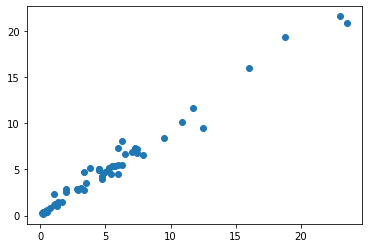

In [15]:
#Plot predictions
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_test,predictions)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

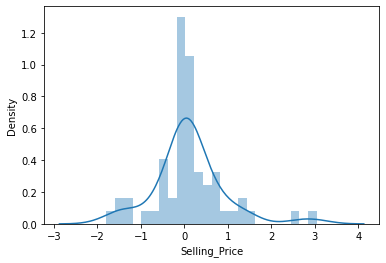

In [14]:
import seaborn as sns
sns.distplot(y_test-predictions)